# 2/14  1. Введение

ВСПОМНИМ, С КАКИМИ ДАННЫМИ МЫ РАБОТАЕМ

In [2]:
import pandas as pd
import numpy as np

melb_dfc = pd.read_csv('data/melb_data_fe.csv')
melb_df = melb_dfc.copy()
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [3]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

`csv`-файл не хранит в себе информацию о типах данных столбцов, поэтому при чтении Pandas автоматически определяет тип данных столбца. Не забывайте об этом, обмениваясь преобразованными данными с вашими коллегами.

Задание 1.1

Преобразуйте столбец `Date` в формат `datetime` и выделите квартал (`quarter`) продажи объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, проданных в этом квартале.

In [4]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'])
melb_df['Date'].dt.quarter.value_counts()


Date
3    4873
2    4359
4    2329
1    2019
Name: count, dtype: int64

Задание 1.2

Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных `category`, исключив из преобразования столбцы `Date`, `Rooms`, `Bedroom`, `Bathroom`, `Car`.
В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных `category`.

In [5]:
unique_list = []
for col in melb_df.columns:
    item = (col, melb_df[col].nunique(), melb_df[col].dtype)
    unique_list.append(item)
unique_counts = pd.DataFrame(
    unique_list, columns=[
        'Colomns', 'Unique', 'Dtype']).sort_values(
            by='Unique', ignore_index=True)
        
display(unique_counts)


,Colomns,Unique,Dtype
0,Weekend,2,int64
1,Type,3,object
2,Method,5,object
3,WeekdaySale,7,int64
4,Regionname,8,object
5,Rooms,9,int64
6,Bathroom,9,int64
7,Car,11,int64
8,StreetType,11,object
9,MonthSale,12,int64


In [6]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # Список столбцов, которые мы не берём во внимание
max_unique_count = 150 # Задаём максимальное число уникальных категорий
for col in melb_df.columns: # Цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # Проверяем условие
        melb_df[col] = melb_df[col].astype('category') # Преобразуем тип столбца
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

# 3/14  2. Сортировка данных в DataFrame

МЕТОД `SORT_VALUES()`

Основные параметры метода `sort_values()`

`by` — имя или список имён столбцов, по значениям которых производится сортировка.  
`axis` — ось, по которой производится сортировка (`0` — строки, `1` — столбцы). По умолчанию сортировка производится по строкам.  
`ascending` — сортировка по **возрастанию** (от меньшего к большему). По умолчанию параметр выставлен на `True`, для сортировки по **убыванию** (от большего к меньшему) необходимо выставить его на `False`.  
`ignore_index` — создаются ли новые индексы в таблице. По умолчанию выставлен на `False` и сохраняет индексы изначальной таблицы.  
`inplace` — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на `False`, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на `True`.

СОРТИРОВКА ПО ЗНАЧЕНИЯМ ОДНОГО СТОЛБЦА

In [7]:
melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,...,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,...,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,...,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,...,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,...,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,...,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,...,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,...,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,...,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,...,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1


In [8]:
melb_df.sort_values(by='Date', ascending=False).head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,...,144.99375,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,...,145.08968,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,...,144.98324,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,...,144.90587,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,...,144.92243,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0
11209,Strathmore,3,house,1742000.0,S,Barry,2017-12-08,8.2,3041,3,...,144.92172,Western Metropolitan,3284,15.750000,-0.693803,12,47,4,Rd,0
11210,Strathmore,3,house,1016000.0,S,other,2017-12-08,8.2,3041,3,...,144.91521,Western Metropolitan,3284,15.750000,-0.413953,12,47,4,St,0
11211,Sunshine,3,house,700000.0,SP,other,2017-12-08,10.5,3020,3,...,144.84569,Western Metropolitan,3755,16.250000,-0.577236,12,67,4,St,0
11212,Sunshine,2,house,615000.0,SP,Barry,2017-12-08,10.5,3020,2,...,144.83206,Western Metropolitan,3755,18.800000,-0.632812,12,77,4,St,0
11213,Sunshine West,3,house,650000.0,VB,hockingstuart,2017-12-08,10.5,3020,3,...,144.80099,Western Metropolitan,6763,18.000000,-0.691554,12,47,4,St,0


СОРТИРОВКА ПО ЗНАЧЕНИЯМ НЕСКОЛЬКИХ СТОЛБЦОВ

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр `by` в виде списка. При этом важно обращать внимание на порядок следования столбцов.

Так, например, отсортируем таблицу сначала по возрастанию расстояния от центра города (`Distance`), а затем — по возрастанию цены объекта (`Price`). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов `Distance` и `Price` результирующей таблицы:

In [9]:
melb_df.sort_values(
    by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


Мы получили таблицу, отсортированную по возрастанию расстояния до центра города. Если встречаются объекты недвижимости, у которых расстояние оказывается одинаковым, то внутри такой группы производится сортировка по цене объекта.

Ради интереса попробуйте поменять порядок следования столбцов в параметре `by` метода `sort_values()` и сравните результат. 

In [10]:
melb_df.sort_values(
    by=['Price', 'Distance']).loc[::10, ['Distance', 'Price']]

,Distance,Price
2652,6.4,85000.0
7116,7.8,200000.0
5206,11.2,220000.0
7240,8.2,241000.0
2898,13.0,250000.0
...,...,...
13341,6.3,4060000.0
8591,1.5,4275000.0
1094,11.2,4700000.0
5801,6.1,5046000.0


In [11]:
ddd = {'counts': [np.random.randint(20) for i in range(20)], 'persent':[np.random.randint(20) for i in range(20)]}
ddd1 = pd.DataFrame(ddd)
ddd1.loc[2:19:5,'persent']# Со 2-го по 19-й, но каждый 5-й.

2      4
7     17
12    16
17    10
Name: persent, dtype: int64

КОМБИНИРОВАНИЕ СОРТИРОВКИ С ФИЛЬТРАЦИЕЙ

Найдём информацию о таунхаусах (`Type`), проданных компанией (`SellerG`) `McGrath`, у которых коэффициент соотношения площадей здания и участка (`AreaRatio`) меньше `-0.8`. Результат отсортируем по дате продажи (`Date`) в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр `ignore_index` на `True`. Для наглядности результата выберем из таблицы только столбцы `Data` и `AreaRatio`:

May option

In [12]:
melb_df[(
    melb_df['Type'] == 'townhouse') & (
        melb_df['SellerG'] == 'McGrath') & (
            melb_df['AreaRatio'] <= -0.8)].sort_values(
                by=['Date', 'AreaRatio'], ascending=[
                    True, False], ignore_index=True).loc[
                        ::, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


Option SkillFactory

In [13]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


ПРО ВАЖНОСТЬ КОПИРОВАНИЯ ПРИ СОРТИРОВКЕ С `inplace=Tru`e

Примечание. Старайтесь не сочетать фильтрацию и метод sort_values() с параметром inplace=True, так как в таком случае у вас возникнет предупреждение (warning) SettingWithCopyWarning: melb_df[melb_df['Rooms'] > 5].sort_values(inplace=True, by=['Rooms']):

C:\Users\Andrey\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingwithCopyWarning:

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ indexing. html#retu rning-a-view-versus-a-copy

    return func(*args, **kwargs)
    
Стоит отметить, что это не ошибка и код в таком случае отработает. Однако Pandas предупреждает вас о том, что при использовании такого кода дальнейшие результаты могут быть неожиданными.

Это предупреждение предназначено для обозначения операций «цепного присваивания». Это ситуация, когда вы пытаетесь напрямую изменить подмножество исходных данных. В нашем случае мы пытаемся отсортировать данные с заменой (об этом говорит параметр inplace=True) исходной таблицы на отсортированную.

Чтобы не возникало подобных конфликтов, необходимо использовать метод copy() для явного создания копии отфильтрованного подмножества исходных данных и работать уже с ней (производить сортировку):

filtered = melb_df[melb_df['Rooms'] > 5].copy()

filtered.sort_values(inplace=True, by=['Rooms'])

filtered.head()

Задание 2.2

Произведите сортировку столбца `AreaRatio` по убыванию. При этом индексы полученной таблицы замените на новые. Какое значение площади здания находится в строке `1558`? Ответ округлите до целого числа.

In [14]:
melb_df.sort_values(
    by='AreaRatio', ascending=False, ignore_index=True).loc[
        1558, 'BuildingArea']

126.0

Задание 2.3

Найдите таунхаусы (`Type`) с количеством жилых комнат (`Rooms`) больше `2`. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (`MeanRoomsSquare`). Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа.

In [15]:
melb_df[(melb_df['Type'] == 'townhouse') & (melb_df[
    'Rooms'] > 2)].sort_values(by=[
        'Rooms', 'MeanRoomsSquare'], ascending=[
            True, False], ignore_index=True).loc[18, 'Price']

1300000.0

# 4/14  3. Группировка данных в DataFrame

МЕТОД `GROUPBY()`

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод `groupby()`.

Основные параметры метода `groupby()`

`by` — имя или список имён столбцов, по которым производится группировка.
`axis` — ось, по которой производится группировка (`0` — строки, `1` — столбцы). По умолчанию группировка производится по строкам.
`as_index` — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на `True`.

Метод `groupby()` возвращает объект `DataFrameGroupBy`, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы (`mean`, `median`, `sum` и т. д.), чтобы рассчитывать показатели внутри каждой группы.

ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С ОДНОЙ АГРЕГАЦИЕЙ

In [16]:
melb_df.groupby(by='Type').mean(numeric_only=True)

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
Type,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


Мы получили таблицу, на пересечении строк и столбцов которой находятся средние значения каждого числового признака в наших данных.

**Примечание**. Если мы хотим видеть тип объекта в качестве отдельного столбца таблицы, мы можем выставить параметр `as_index` на `False`:

In [17]:
melb_df.groupby(by='Type', as_index=False).mean(numeric_only=True)

,Type,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
0,house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
1,townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
2,unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


Как правило, нам не нужна информация обо всех столбцах, поэтому агрегирующие методы можно применять только к интересующему нас столбцу. Например, давайте сравним средние цены на объекты в зависимости от их типа:

In [18]:
melb_df.groupby('Type')['Price'].mean()

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

**Примечание**. Обратите внимание, что, так как мы считаем только один показатель (среднее) для одного столбца, в результате мы получаем объект `Series`.

Теперь давайте выясним, какие регионы (`Regionname`) наиболее удалены от центра Мельбурна.

In [19]:
melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С НЕСКОЛЬКИМИ АГРЕГАЦИЯМИ

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом `agg()`, который принимает список строк с названиями агрегаций.

Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (`Price`), сгруппированных по номеру месяца продажи (`MonthSale`). Результат отсортируем по количеству продаж в порядке убывания:

In [20]:
melb_df.groupby('MonthSale')['Price'].agg(['count', 'max', 'mean']).sort_values(by='count', ascending=False)

,count,max,mean
MonthSale,,,
8,1850,6500000.0,1.056371e+06
7,1835,9000000.0,9.314698e+05
5,1644,8000000.0,1.097807e+06
6,1469,7650000.0,1.068981e+06
3,1408,5600000.0,1.146762e+06
4,1246,5500000.0,1.050479e+06
9,1188,6400000.0,1.126349e+06
10,854,6250000.0,1.135970e+06
11,750,5050000.0,1.142503e+06


**Примечание**. Обратите внимание, что, так как мы считаем несколько показателей для одного столбца, в результате мы получаем объект `DataFrame`.

**Примечание**. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом `agg()`, передав в качестве его параметра строку '`describe`':

In [21]:
melb_df.groupby('MonthSale')['Price'].agg('describe')# = ... .describe()

,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


После базовых математических функций наиболее частым агрегированием является подсчёт числа уникальных значений. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода `agg()` строку '`nunique`'. 

Более того, метод `agg()` поддерживает использование и других функций. Передадим дополнительно встроенную функцию `set`, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [22]:
melb_df.groupby('Regionname')['SellerG'].agg(['nunique', set]).sort_values(by='nunique', ascending=False)

,nunique,set
Regionname,,
Northern Metropolitan,40,"{HAR, Collins, Sweeney, Burnham, Rendina, hock..."
Southern Metropolitan,38,"{HAR, Gary, Noel, Buxton, Collins, Rendina, ho..."
Western Metropolitan,34,"{HAR, Sweeney, Burnham, Rendina, hockingstuart..."
Eastern Metropolitan,26,"{HAR, Gary, Noel, Buxton, hockingstuart, Harco..."
South-Eastern Metropolitan,25,"{HAR, Gary, Noel, Buxton, hockingstuart, Thoms..."
Eastern Victoria,11,"{O'Brien, Harcourts, other, Ray, HAR, Eview, B..."
Northern Victoria,11,"{other, Ray, HAR, Buckingham, YPA, Raine, Barr..."
Western Victoria,6,"{other, Ray, HAR, YPA, Raine, hockingstuart}"


Задание 3.1

Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.

In [23]:
melb_df.groupby('Rooms')['Price'].mean().sort_values(ascending=False)

Rooms
7     1.920700e+06
5     1.870260e+06
6     1.849366e+06
8     1.602750e+06
4     1.445282e+06
3     1.076081e+06
10    9.000000e+05
2     7.750812e+05
1     4.338245e+05
Name: Price, dtype: float64

Задание 3.2

Какой регион имеет наименьшее стандартное отклонение по географической широте (`Lattitude`)?
В качестве ответа запишите название этого региона.

In [24]:
melb_df.groupby('Regionname')['Lattitude'].std().sort_values()

Regionname
Western Victoria              0.011579
Southern Metropolitan         0.043080
Eastern Metropolitan          0.047890
Northern Metropolitan         0.049639
Western Metropolitan          0.051251
South-Eastern Metropolitan    0.073411
Northern Victoria             0.084455
Eastern Victoria              0.147067
Name: Lattitude, dtype: float64

Задание 3.3

Какая риелторская компания (`SellerG`) имеет наименьшую общую выручку за период с 1 мая по 1 сентября (включительно) 2017 года?
Для ответа на этот вопрос рассчитайте сумму продаж (`Price`) каждой компании в заданный период.
Не забудьте перевести даты в формат `datetime`.

In [25]:
melb_df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [26]:
data_from = (melb_df['Date'] >= pd.to_datetime('2017.05.01'))
data_to = (melb_df['Date'] <= pd.to_datetime('2017.09.01'))
melb_df[data_from & data_to].groupby('SellerG')['Price'].sum().sort_values().index[0]

'LITTLE'

# 5/14  4. Сводные таблицы

МЕТОД `GROUPBY` КАК СПОСОБ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ

Mы уже умеем строить таблицу, которая показывает зависимость медианной цены и площади здания от числа комнат:

In [27]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


Также можно построить таблицу, в которой мы будем учитывать не только число комнат, но и тип здания (`Type`). Для этого в параметрах метода `groupby()` укажем список из нескольких интересующих нас столбцов.

In [28]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
       unit                  NaN
6      house        1.869508e+06
       townhouse             NaN
       unit         5.200000e+05
7      house        1.920700e+06
       townhouse             NaN
       unit                  NaN
8      house        1.510286e+06
       townhouse             NaN
       unit         2.250000e+06
10     house        9.000000e+05
       townhouse             NaN
       unit                  NaN
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется иерархической. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде `Series` с иерархическими индексами, к результату чаще всего применяют метод `unstack()`, который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [29]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


МЕТОД `PIVOT_TABLE` ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ

На самом деле метод groupby редко используется при двух параметрах, так как для построения сводных таблиц существует специальный и более простой метод — `pivot_table()`.

Основные параметры метода `pivot_table()`

`values` — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;  
`index` — имя столбца, значения которого станут строками сводной таблицы;  
`columns` — имя столбца, значения которого станут столбцами сводной таблицы;  
`aggfunc` — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, '`mean`');  
`fill_value` — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

Давайте построим ту же самую таблицу, но уже с использованием метода `pivot_table`. В качестве параметра `values` укажем столбец `Price`, в качестве индексов сводной таблицы возьмём `Rooms`, а в качестве столбцов — `Type`. Агрегирующую функцию оставим по умолчанию (среднее). Дополнительно заменим пропуски в таблице на значение `0`. Финальный результат для наглядности вывода округлим с помощью метода `round()` до целых.

In [30]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',    fill_value=0
).round()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


А теперь давайте проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной. Для этого построим сводную таблицу, в которой строками будут являться названия регионов (`Regionname`), а в столбцах будет располагаться наш «признак-мигалка» выходного дня (`Weekend`), который равен `1`, если день был выходным, и `0` — в противном случае. В качестве значений сводной таблицы возьмём количество продаж.

In [31]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)

Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


Разберём ещё один пример: найдём, как зависит средняя и медианная площадь участка (`Landsize`) от типа объекта (`Type`) и его региона (`Regionname`). Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент `aggfunc` список из агрегирующих функций. Построим такую сводную таблицу, где пропущенные значения заменим на `0`:

In [32]:
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

Обратите внимание на добавление дополнительных индексов столбцов `median` и `mean`. Здесь медианное и среднее значения рассчитаны отдельно для каждой комбинации признаков.

МНОГОМЕРНЫЕ СВОДНЫЕ ТАБЛИЦЫ

Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр `index` или параметр `columns`.

Давайте построим таблицу, в которой по индексам будут располагаться признаки метода продажи (`Method`) и типа объекта (`Type`), по столбцам — наименование региона (`Regionname`), а на пересечении строк и столбцов будет стоять медианная цена объекта (`Price`):

In [33]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
    )

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

ДОСТУП К ДАННЫМ В СВОДНОЙ ТАБЛИЦЕ

Давайте рассмотрим, что собой представляют столбцы сложной сводной таблицы.

Запишем сводную таблицу, которую мы создавали ранее в переменную `pivot`:

In [34]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

В результате мы получаем объект `MultiIndex`. Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть есть шесть возможных вариантов обращения к столбцам таблицы.

Так, из таблицы `pivot` мы можем получить средние значения площадей участков для типа здания `unit`, просто последовательно обратившись по имени столбцов:

In [35]:
pivot['mean']['unit']

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

Аналогично производится и фильтрация данных. Например, если нам нужны регионы, в которых средняя площадь здания для домов типа `house` меньше их медианной площади, то мы можем найти их следующим образом:

In [36]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                       mean              \
Type                   house townhouse unit       house   townhouse   
Regionname                                                            
Southern Metropolitan  586.0     246.0    0  569.643881  278.858824   
Western Metropolitan   531.0     198.0   62  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

Чтобы получить индексы отфильтрованной таблицы, можно воспользоваться атрибутом `index` и обернуть результат в список:

In [37]:
print(list(filtered_pivot.index))
# ['Southern Metropolitan', 'Western Metropolitan']

['Southern Metropolitan', 'Western Metropolitan']


Примечание. На самом деле мультииндексные таблицы можно создавать и вручную. Давайте посмотрим на синтаксис данной конструкции:

In [38]:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
	index=[['white','white','white','blue','blue','red','red','red'], 
           ['up','down','right','up','down','up','down','left']])
display(mser)

white  up       0.751335
       down     0.493399
       right    0.476824
blue   up       0.440602
       down     0.570586
red    up       0.634122
       down     0.000251
       left     0.411132
dtype: float64

Если посмотреть на индексы `Series`, можно увидеть, что они являются мультииндексами:

In [39]:
print(mser.index)

MultiIndex([('white',    'up'),
            ('white',  'down'),
            ('white', 'right'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            (  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left')],
           )


Аналогично создаются `DataFrame` со вложенными признаками (вложенными столбцами) — для этого вложенный список передаётся в параметр `columns` при инициализации таблицы:

In [40]:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up    0.206777  0.090588  0.606953 -0.635787
      down -2.163302 -0.377819  1.451800  1.168157
red   up   -1.807131 -0.300436  0.021296  0.372902
      down -1.438824  1.747091 -1.031243 -0.445241

Задание 4.2

Составьте сводную таблицу, которая показывает зависимость медианной площади (`BuildingArea`) здания от типа объекта недвижимости (`Type`) и количества жилых комнат в доме (`Rooms`). Для какой комбинации признаков площадь здания наибольшая?
В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.

In [41]:
melb_df.pivot_table(
        values='BuildingArea', 
        index='Type', 
        columns='Rooms', 
        aggfunc='median'
)

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126.0,126.0,141.0,177.0,126.0,216.5,126.0,126.0
townhouse,88.0,114.0,126.0,159.5,152.0,NaN,NaN,NaN,NaN
unit,69.5,110.0,126.0,126.0,NaN,171.0,NaN,126.0,NaN


Задание 4.3

Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (`Price`) от риелторского агентства (`SellerG`) и типа здания (`Type`).
Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа `unit` максимальна. В качестве ответа запишите название этого агентства.

In [42]:
median_price = melb_df.pivot_table(
        values='Price', 
        index='SellerG', 
        columns='Type', 
        aggfunc='median'
)
median_price.sort_values(by='unit', ascending=False)

Type,house,townhouse,unit
SellerG,,,
Nick,2025000.0,780000.0,900000.0
Marshall,1975000.0,1408500.0,715000.0
Cayzer,1505000.0,1450000.0,707500.0
Kay,2220000.0,1365000.0,695000.0
Noel,1400500.0,990000.0,693250.0
Buxton,1323750.0,1030000.0,670000.0
Fletchers,1390000.0,1238000.0,653000.0
Chisholm,1520000.0,950000.0,640000.0
Philip,1035000.0,701000.0,636000.0


# 6/14  5. Объединение DataFrame: знакомимся с новыми данными

С КАКИМИ ДАННЫМИ МЫ РАБОТАЕМ?

В этой части модуля мы будем работать с популярным датасетом `MovieLens`, в котором собраны логи некоторой рекомендательной системы фильмов.

Наши данные представляют собой четыре таблицы:

`ratings1` и `ratings2` — таблицы с данными о выставленных пользователями оценках фильмов. Они имеют одинаковую структуру и типы данных — на самом деле это две части одной таблицы с оценками фильмов.  
- `userId` — уникальный идентификатор пользователя, который выставил оценку;   
- `movieId` — уникальный идентификатор фильма;  
- `rating` — рейтинг фильма.  

`dates` — таблица с датами выставления всех оценок.  

`movies` — таблица с информацией о фильмах.  
- `movieId` — уникальный идентификатор фильма;
- `title` — название фильма и год его выхода;
- `genres` — жанры фильма.

Итак, представим, что нам надо получить единую таблицу, в которой будут собраны рейтинги, даты выставления рейтингов, а также информация о фильмах. Вот как мы будем действовать:

1
Склеим таблицы `ratings1` и `ratings2` в единую структуру.

2
К полученной таблице с рейтингами подсоединим столбец с датой проставления рейтинга, склеив столбцы таблиц между собой.

3
Присоединим к нашей таблице информацию о названиях и жанрах фильмов.

ЗАЧЕМ ХРАНИТЬ ДАННЫЕ В РАЗНЫХ ТАБЛИЦАХ?

Задание 5.1

Значения из какого столбца таблиц `ratings1` и `ratings2` можно расшифровать с помощью таблицы `movies`?

In [43]:
dates = pd.read_csv('data/movies_data/dates.csv').copy()
movies = pd.read_csv('data/movies_data/movies.csv').copy()
ratings1 = pd.read_csv('data/movies_data/ratings1.csv').copy()
ratings2 = pd.read_csv('data/movies_data/ratings2.csv').copy()
#dates
movies
#ratings1
#ratings2

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Задание 5.2

Сколько уникальных фильмов представлено в таблице `movies`?

In [44]:
movies['title'].nunique

<bound method IndexOpsMixin.nunique of 0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object>

Задание 5.3

Сколько уникальных пользователей в таблице `ratings1`?

In [45]:
ratings1.nunique()

userId      274
movieId    6219
rating       10
dtype: int64

Задание 5.4

В каком году было выставлено больше всего оценок?
Для ответа на этот вопрос используйте таблицу `dates`.

In [46]:
dates['date'] = pd.to_datetime(dates['date'])
dates['date'].dt.year.value_counts()

date
2000    10061
2017     8198
2007     7114
2016     6703
2015     6616
2018     6418
1996     6040
2005     5813
2012     4656
2008     4351
2009     4158
2006     4059
2003     4014
2001     3922
2002     3478
2004     3279
1999     2439
2010     2301
1997     1916
2011     1690
2013     1664
2014     1439
1998      507
Name: count, dtype: int64

# 7/14  6. Объединение `DataFrame`: `concat`

Основные параметры функции `concat()`

`objs` — список объектов `DataFrame` ([df1, df2,…]), которые должны быть сконкатенированы;  
`axis` — ось определяет направление конкатенации: `0` — конкатенация по строкам (по умолчанию), `1` — конкатенация по столбцам;  
`join` — либо `inner` (пересечение), либо `outer` (объединение); рассмотрим этот момент немного позже;  
`ignore_index` — по умолчанию установлено значение `False`, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение `True`, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.

**Примечание**. Обратите внимание, что concat является функцией библиотеки, а не методом DataFrame. Поэтому её вызов осуществляется как `pd.concat(...)`.

In [47]:
ratings = pd.concat([ratings1, ratings2])
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


В результате мы увеличили первую таблицу, добавив снизу строки второй таблицы.

По умолчанию concat сохраняет первоначальные индексы объединяемых таблиц, а обе наши таблицы индексировались, начиная от 0. Чтобы создать новые индексы, нужно выставить параметр `ignore_index` на `True`:

In [48]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0


Давайте узнаем количество строк в таблицах `ratings` и `dates`, ведь нам предстоит вертикально склеить их между собой:

In [49]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

# Число строк в таблице ratings: 100837
# Число строк в таблице dates: 100836
# False

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


При выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (`ratings1` и `ratings2`). В результате конкатенации случилось дублирование строк. В данном примере их легко найти — выведем последнюю строку таблицы `ratings1` и первую строку таблицы `ratings2`:

In [50]:
display(ratings1.tail(1))
display(ratings2.head(1))

,userId,movieId,rating
40000,274,5621,2.0


,userId,movieId,rating
0,274,5621,2.0


Чтобы очистить таблицу от дублей, мы можем воспользоваться методом `DataFrame` `drop_duplicates()`, который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр `ignore_index` в методе `drop_duplicates()` на значение `True`:

In [51]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])
# Число строк в таблице ratings: 100836

Число строк в таблице ratings:  100836


Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы `ratings` и `dates` по столбцам:

In [54]:
ratings_dates = pd.concat([ratings, dates], axis=1)
display(ratings_dates.tail(7))

,userId,movieId,rating,date
100829,610,164179,5.0,2017-05-03 21:07:11
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


# 8/14  7. Объединение `DataFrame`: `join`, `merge`

ТИПЫ ОБЪЕДИНЕНИЙ

Типы объединений в Pandas тесно связаны с операцией `join` из `SQL`, которую мы будем рассматривать в курсе в дальнейшем.

Прежде чем мы перейдём к дальнейшей работе с таблицами о фильмах, рассмотрим два основных типа объединения таблиц:

`inner` (внутреннее)

При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах.

Аналогия в теории множеств: Пересечение (`intersection`) множеств А и В.  

Строки, для которых совпадение не было найдено, удаляются.

`outer` (внешнее)

Данный тип делится на три подтипа:

`full` — используется как `outer` по умолчанию, объединяет все варианты в обеих таблицах.

Аналогия в теории множеств: Объединение (`union`) множеств А и В.  

`left` — для всех записей из «левой» таблицы (например, `ratings`) ведётся поиск соответствий в «правой» (например, `movies`). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из `ratings`.

Аналогия в теории множеств:Вычитание (`difference`) множества B из результата объединения (`union`) множеств А и В.  

`right` — аналогично предыдущему, но остаются значения только из «правой» таблицы.  

Аналогия в теории множеств: Вычитание (`difference`) множества А из результата объединения (`union`) множеств А и В.

**ПРИМЕЧАНИЕ.** Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).

МЕТОД ОБЪЕДИНЕНИЯ JOIN

Основные параметры метода `join()`

`other` — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».  
`how` — параметр типа объединения. Он может принимать значения '`inner`', '`left`' (`left outer`), '`right`' (`right outer`), и '`outer`' (`full outer`). По умолчанию параметр установлен на '`left`'.  
`on` — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».  
`lsuffix` и `rsuffix` — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

Если использовать метод `join()` «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.

Проверим это, объединив таблицы типом `left`. Так как в наших таблицах есть одноимённые столбцы, установим один из суффиксов, чтобы избежать ошибки:

In [58]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='left'
)
display(joined_false)

,userId,movieId,rating,date,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,NaN,NaN,NaN
100832,610,168248,5.0,2017-05-03 22:21:31,NaN,NaN,NaN
100833,610,168250,5.0,2017-05-08 19:50:47,NaN,NaN,NaN
100834,610,168252,5.0,2017-05-03 21:19:12,NaN,NaN,NaN


При объединении таблиц по индексам в результирующую таблицу попали все строки из «левой» таблицы, а недостающие строки из «правой» были заполнены пропусками. Так работает тип объединения `left`.

Обратите внимание, что в данном случае у нас получилось два столбца, соответствующих идентификатору фильма: один — из «левой» таблицы (`movieId`), а другой — из «правой» (`movieId_right`).

Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода `join()`, необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода `set_index()`. Также необходимо указать название ключа в параметре on.

In [62]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


В результате такого объединения для каждого идентификатора фильма `movieId` в таблице `ratings_dates` найден совпадающий с ним идентификатор `movieId` в таблице `movies` и присоединена информация о самом фильме (`title` и `genres`). Это как раз то, что нам нужно.

*Обратите внимание, что в результате такого объединения остался лишь один столбец `movieId`.*

МЕТОД ОБЪЕДИНЕНИЯ `MERGE`

Аналогично предыдущему, метод `merge()` предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от `join()`, метод `merge()` предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

Основные параметры метода `merge()`

`right` — присоединяемая таблица. По умолчанию она является «правой».  
`how` — параметр типа объединения. По умолчанию принимает значение '`inner`'.  
`on` — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.  
`left_on` — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.  
`right_on` — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

→ Метод `merge()` в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, `merge()` проще в использовании и более многофункционален, чем схожие методы.

In [69]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)
display(merged.shape)
# (100836, 6)
display(merged.head())

(100836, 6)

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


ОСОБЕННОСТИ ИСПОЛЬЗОВАНИЯ `MERGE()`

Возникает вопрос: почему мы выбрали тип объединения `left`, а не `full`, например?



 Объединим `ratings_dates` с movies по ключевому столбцу `movieId`, но с параметром `how='outer'` (`full outer`) и выведем размер таблицы, а также её «хвост»:

In [66]:
merged2 = ratings_dates.merge(
    movies,
    on='movieId',
    how='outer'
)
print('Число строк в таблице merged2: ', merged2.shape[0])
display(merged2.tail())
# Число строк в таблице merged: 100854

Число строк в таблице merged2:  100854


,userId,movieId,rating,date,title,genres
100849,NaN,30892,NaN,NaT,In the Realms of the Unreal (2004),Animation|Documentary
100850,NaN,32160,NaN,NaT,Twentieth Century (1934),Comedy
100851,NaN,32371,NaN,NaT,Call Northside 777 (1948),Crime|Drama|Film-Noir
100852,NaN,34482,NaN,NaT,"Browning Version, The (1951)",Drama
100853,NaN,85565,NaN,NaT,Chalet Girl (2011),Comedy|Romance


Оказывается, в таблице `movies` содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом `full outer` информация о фильмах перенеслась из таблицы `movies` в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы `ratings_dates` заполнились пропусками (`NaN`). Такие фильмы были записаны в конец таблицы.

**Важно! Учитывайте такие нюансы при работе с несколькими таблицами и всегда проверяйте результат объединения.**

→ Метод `merge()` с внешним (`outer`) типом объединения может использоваться как аналог метода `concat()` при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

In [70]:
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)
# Число строк в таблице merge_ratings: 100836

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Обратите внимание, что при использовании метода `merge()` для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода `concat()`. Это особенность метода `merge()` — автоматическое удаление дублей.

КАКОЙ МЕТОД ОБЪЕДИНЕНИЯ ИСПОЛЬЗОВАТЬ?

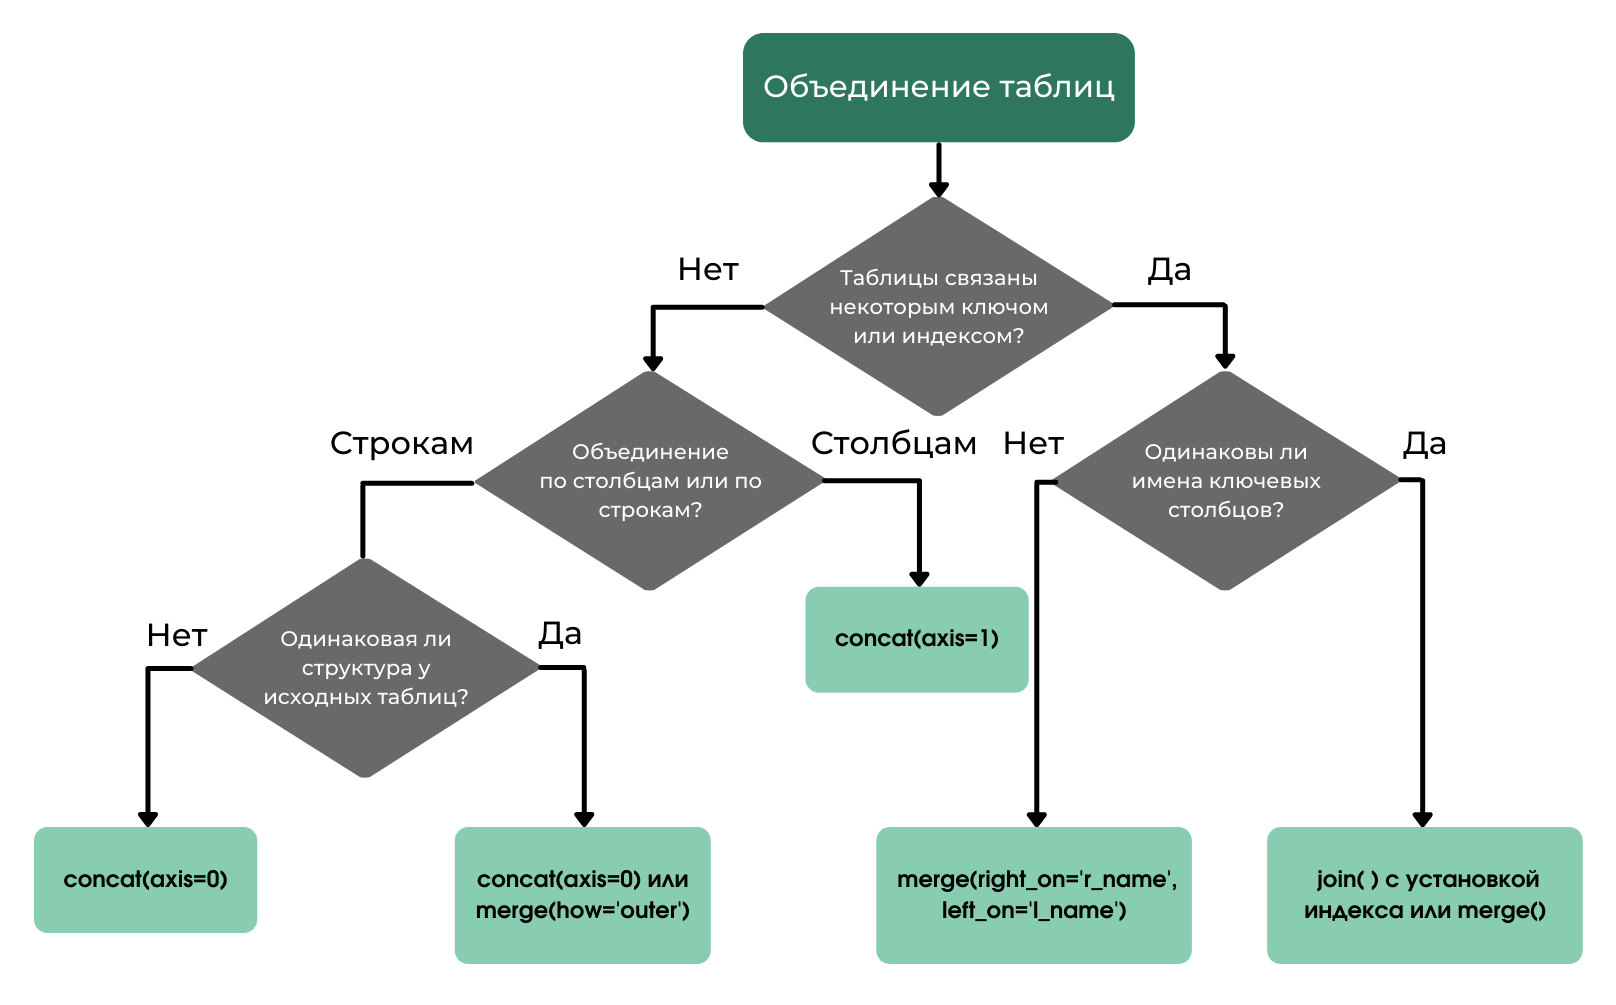